# Flash Floods at USA
## by Mohamed M. Saad

## Preliminary Wrangling

This document explores a dataset containing Storm Events database from January 1950 to May 2020, as entered by NOAA's National Weather Service (NWS). Bulk data are available in comma-separated files (CSV)from the following link https://www.ncdc.noaa.gov/stormevents/ftp.jsp

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', 100)

%matplotlib inline

In [4]:
import glob

def read_path(path_pattern):
    files = glob.glob(path_pattern)
    files_df = []
    for file in files:
        file_df = pd.read_csv(file, index_col=None)
        files_df.append(file_df)
    return pd.concat(files_df, axis=0, ignore_index=True)
    

# Details
df = read_path("data/files/StormEvents_details-ftp_v1.0*.csv")
df = df[(df['EVENT_TYPE'] == 'Flash Flood') & (df['YEAR'] < 2020)]

In [5]:
print(df.shape)
print(df.dtypes)
df.head()

(85111, 51)
BEGIN_YEARMONTH         int64
BEGIN_DAY               int64
BEGIN_TIME              int64
END_YEARMONTH           int64
END_DAY                 int64
END_TIME                int64
EPISODE_ID            float64
EVENT_ID                int64
STATE                  object
STATE_FIPS            float64
YEAR                    int64
MONTH_NAME             object
EVENT_TYPE             object
CZ_TYPE                object
CZ_FIPS                 int64
CZ_NAME                object
WFO                    object
BEGIN_DATE_TIME        object
CZ_TIMEZONE            object
END_DATE_TIME          object
INJURIES_DIRECT         int64
INJURIES_INDIRECT       int64
DEATHS_DIRECT           int64
DEATHS_INDIRECT         int64
DAMAGE_PROPERTY        object
DAMAGE_CROPS           object
SOURCE                 object
MAGNITUDE             float64
MAGNITUDE_TYPE         object
FLOOD_CAUSE            object
CATEGORY              float64
TOR_F_SCALE            object
TOR_LENGTH            float6

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
36558,201104,27,1227,201104,27,1500,50307.0,302997,MISSISSIPPI,28.0,2011,April,Flash Flood,C,143,TUNICA,MEG,27-APR-11 12:27:00,CST-6,27-APR-11 15:00:00,0,0,0,0,125.00K,0.00K,Emergency Manager,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,O K,2.0,N,JEFFRIES,34.6367,-90.4971,34.5361,-90.5315,A stationary front remained draped across Sout...,Heavy rain produced flash flooding all across ...,CSV
36598,201104,27,630,201104,27,1400,50307.0,303708,MISSISSIPPI,28.0,2011,April,Flash Flood,C,81,LEE,MEG,27-APR-11 06:30:00,CST-6,27-APR-11 14:00:00,0,0,0,0,0.00K,0.00K,Public,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NW,BALDWYN,1.0,NNE,FROG IS,34.5440,-88.6748,34.3777,-88.7668,A stationary front remained draped across Sout...,Heavy rain produced flash flooding all across ...,CSV
36599,201104,26,1830,201104,27,300,50307.0,303729,MISSISSIPPI,28.0,2011,April,Flash Flood,C,107,PANOLA,MEG,26-APR-11 18:30:00,CST-6,27-APR-11 03:00:00,0,0,0,0,150.00K,0.00K,Trained Spotter,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,ASKEW,4.0,SW,CRENSHAW,34.5394,-90.1930,34.4660,-90.2527,A stationary front remained draped across Sout...,Heavy rain produced widespread road flooding a...,CSV
36734,201108,6,2050,201108,6,2300,56921.0,340975,VIRGINIA,51.0,2011,August,Flash Flood,C,47,CULPEPER,LWX,06-AUG-11 20:50:00,EST-5,06-AUG-11 23:00:00,0,0,0,0,0.00K,0.00K,State Official,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,WNW,CULPEPER,2.0,SW,CULPEPER,38.4818,-78.0075,38.4532,-78.0258,A slow eastward-moving surface boundary in ass...,Numerous road closures were reported in Culpep...,CSV
36735,201108,6,2100,201108,6,2300,56921.0,340976,VIRGINIA,51.0,2011,August,Flash Flood,C,47,CULPEPER,LWX,06-AUG-11 21:00:00,EST-5,06-AUG-11 23:00:00,0,0,0,0,0.00K,0.00K,Public,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,E,WHITE SHOP,1.0,ESE,WHITE SHOP,38.4300,-78.0500,38.4248,-78.0439,A slow eastward-moving surface boundary in ass...,The public reported a bridge was washed out on...,CSV


In [6]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,CZ_FIPS,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,85111.000000,85111.000000,85111.000000,85111.000000,85111.000000,85111.000000,8.511100e+04,8.511100e+04,85111.000000,85111.000000,85111.000000,85111.000000,85111.000000,85111.000000,85111.000000,86.000000,0.0,0.0,0.0,0.0,55614.000000,55636.000000,53500.000000,53500.00000,53500.000000,53500.000000
mean,200819.069920,15.775293,1341.360952,200819.069920,15.918941,1360.949161,6.454920e+05,2.502306e+06,32.017906,2008.125283,102.151555,0.075231,0.000623,0.017941,0.000646,34.644767,NaN,NaN,NaN,NaN,2.678606,2.816845,36.497809,-91.45703,36.487856,-91.448854
std,691.728892,8.882693,649.867981,691.728892,8.887907,689.850924,7.449168e+05,2.467666e+06,17.552396,6.915590,106.069162,5.114243,0.031966,0.262433,0.033403,111.983426,NaN,NaN,NaN,NaN,4.533334,4.645320,5.269615,12.92993,5.267336,12.929032
min,199601.000000,1.000000,0.000000,199601.000000,1.000000,0.000000,1.000000e+01,9.000000e+00,1.000000,1996.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,-14.400000,-171.03270,-14.456000,-170.905900
25%,200212.000000,8.000000,830.000000,200212.000000,8.000000,800.000000,6.785500e+04,4.090440e+05,20.000000,2002.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,33.530000,-97.27985,33.525250,-97.262150
50%,200809.000000,16.000000,1500.000000,200809.000000,16.000000,1515.000000,1.258090e+05,7.572480e+05,33.000000,2008.000000,75.000000,0.000000,0.000000,0.000000,0.000000,3.550000,NaN,NaN,NaN,NaN,2.000000,2.000000,36.930000,-91.55500,36.921650,-91.552350
75%,201409.000000,23.000000,1845.000000,201409.000000,24.000000,1930.000000,1.164156e+06,5.397128e+06,47.000000,2014.000000,133.000000,0.000000,0.000000,0.000000,0.000000,6.750000,NaN,NaN,NaN,NaN,3.000000,3.000000,40.002425,-82.53000,39.988725,-82.519500
max,201912.000000,31.000000,2359.000000,201912.000000,31.000000,2359.000000,2.414708e+06,5.724797e+06,99.000000,2019.000000,840.000000,800.000000,3.000000,36.000000,5.000000,800.000000,NaN,NaN,NaN,NaN,177.000000,176.000000,65.621700,144.80000,65.616500,144.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85111 entries, 36558 to 1625727
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     85111 non-null  int64  
 1   BEGIN_DAY           85111 non-null  int64  
 2   BEGIN_TIME          85111 non-null  int64  
 3   END_YEARMONTH       85111 non-null  int64  
 4   END_DAY             85111 non-null  int64  
 5   END_TIME            85111 non-null  int64  
 6   EPISODE_ID          85111 non-null  float64
 7   EVENT_ID            85111 non-null  int64  
 8   STATE               85111 non-null  object 
 9   STATE_FIPS          85111 non-null  float64
 10  YEAR                85111 non-null  int64  
 11  MONTH_NAME          85111 non-null  object 
 12  EVENT_TYPE          85111 non-null  object 
 13  CZ_TYPE             85111 non-null  object 
 14  CZ_FIPS             85111 non-null  int64  
 15  CZ_NAME             85111 non-null  object 
 16

### What is the structure of your dataset?

The event attributes provided in the dataset are:
- **BEGIN YEARMONTH**: The year and month that the event began
- **BEGIN DAY**: The day of the month that the event began
- **BEGIN TIME**: The time of day that the event began
- **END YEARMONTH**: The year and month that the event ended
- **END DAY**: The day of the month that the event ended
- **END TIME**: The time of day that the event ended
- **EPISODE ID**: ID assigned by NWS to denote the storm episode; Episodes may contain multiple Events.
- **EVENT ID**: ID assigned by NWS for each individual storm event contained within a storm episode;
- **STATE**: The state name where the event occurred
- **STATE FIPS**: A unique number assigned to the county
- **YEAR**: The four digit year for the event in this record.
- **MONTH NAME**: The name of the month for the event in this record
- **EVENT TYPE**: Storm type**: Hail, Thunderstorm Wind, Snow, Ice
- **CZ TYPE**: Indicates whether the event happened in a (C) County/Parish, (Z) NWS Public Forecast Zone or (M) Marine.
- **CZ FIPS**: The county FIPS number is a unique number assigned to the county
- **CZ NAME**: County/Parish, Zone or Marine Name assigned to the county
- **WFO**: The National Weather Service Forecast Office’s area of responsibility
- **BEGIN DATE TIME**: The date that the event began
- **CZ TIMEZONE**: The timezone that the event began
- **END DATE TIME**: The date that the event ended
- **INJURIES DIRECT**: The number of injuries directly caused by the weather event.
- **INJURIES INDIRECT**: The number of injuries indirectly caused by the weather event.
- **DEATHS DIRECT**: The number of deaths directly caused by the weather event.
- **DEATHS INDIRECT**: The number of deaths indirectly caused by the weather event.
- **DAMAGE PROPERTY**: The estimated amount of damage to property incurred by the weather event
- **DAMAGE CROPS**: The estimated amount of damage to crops incurred by the weather event
- **SOURCE**: The source reporting the weather event
- **MAGNITUDE**: The measured extent of the magnitude type
- **MAGNITUDE TYPE**: EG = Wind Estimated Gust; ES = Estimated Sustained Wind; MS = Measured Sustained Wind; MG = Measured Wind Gust (no magnitude is included for instances of hail).
- **FLOOD CAUSE**: Reported or estimated cause of the flood.
- **CATEGORY**: Unknown
- **TOR F SCALE**: Enhanced Fujita Scale describes the strength of the tornado based on the amount and type of damage caused by the tornado
- **TOR LENGTH**: Length of the tornado or tornado segment while on the ground (in miles to the tenth).
- **TOR WIDTH**: Width of the tornado or tornado segment while on the ground (in feet).
- **TOR OTHER WFO**: Indicates the continuation of a tornado segment as it crossed from one National Weather Service Forecast Office to another
- **TOR OTHER CZ STATE**: The two-character representation for the state name of the continuing tornado segment as it crossed from one county or zone to another
- **TOR OTHER CZ FIPS**: The FIPS number of the county entered by the continuing tornado segment as it crossed from one county to another
- **TOR OTHER CZ NAME**: The FIPS name of the county entered by the continuing tornado segment as it crossed from one county to another
- **BEGIN RANGE**: The distance to the nearest tenth of a mile, to the location referenced below.
- **BEGIN AZIMUTH**: 16-point compass direction from the location referenced below.
- **BEGIN LOCATION**: The name of city, town or village from which the range is calculated and the azimuth is determined.
- **END RANGE**: The distance to the nearest tenth of a mile, to the location referenced below.
- **END AZIMUTH**: 16-point compass direction from the location referenced below.
- **END LOCATION**: The name of city, town or village from which the range is calculated and the azimuth is determined.
- **BEGIN LAT**: The latitude in decimal degrees of the begin point of the event or damage path.
- **BEGIN LON**: The longitude in decimal degrees of the begin point of the event or damage path.
- **END LAT**: The latitude in decimal degrees of the end point of the event or damage path
- **END LON**: The longitude in decimal degrees of the end point of the event or damage path
- **EPISODE NARRATIVE**: The episode narrative depicting the general nature and overall activity of the episode
- **EVENT NARRATIVE**: The event narrative provides descriptive details of the individual event.
- **DATA SOURCE**: The source reporting the weather event


### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

Let's start our exploration by looking at the main variables of interest. Is the distribution skewed or symmetric? Is it unimodal or multimodal?


### Floods Trend

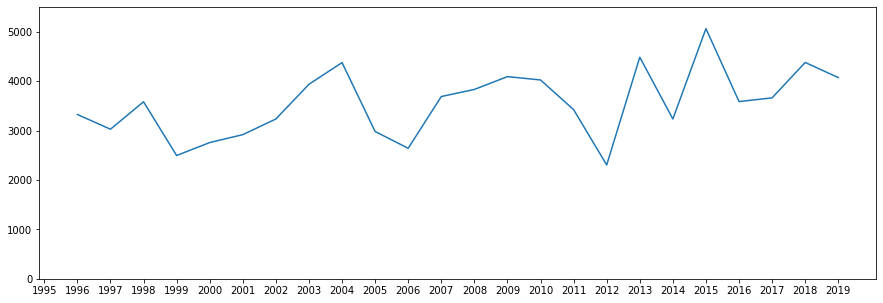

In [8]:
plt.figure(figsize = [15, 5])
plt.plot(df[['YEAR', 'BEGIN_YEARMONTH']].groupby(['YEAR']).agg(['count']));
x_ticks = np.arange(1995, 2020, 1)
plt.ylim(0, 5500)
plt.xticks(x_ticks);

In [9]:
df['MONTH'] = pd.DatetimeIndex(df['BEGIN_DATE_TIME']).month

### Month of Year

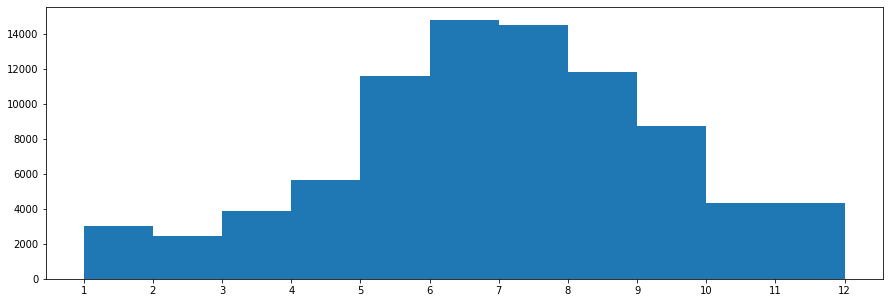

In [10]:
plt.figure(figsize = [15, 5])
x_ticks = np.arange(1,13,1)
plt.hist(data = df, x= 'MONTH', bins = x_ticks);
plt.xticks(x_ticks)
plt.show()

### Floods By State

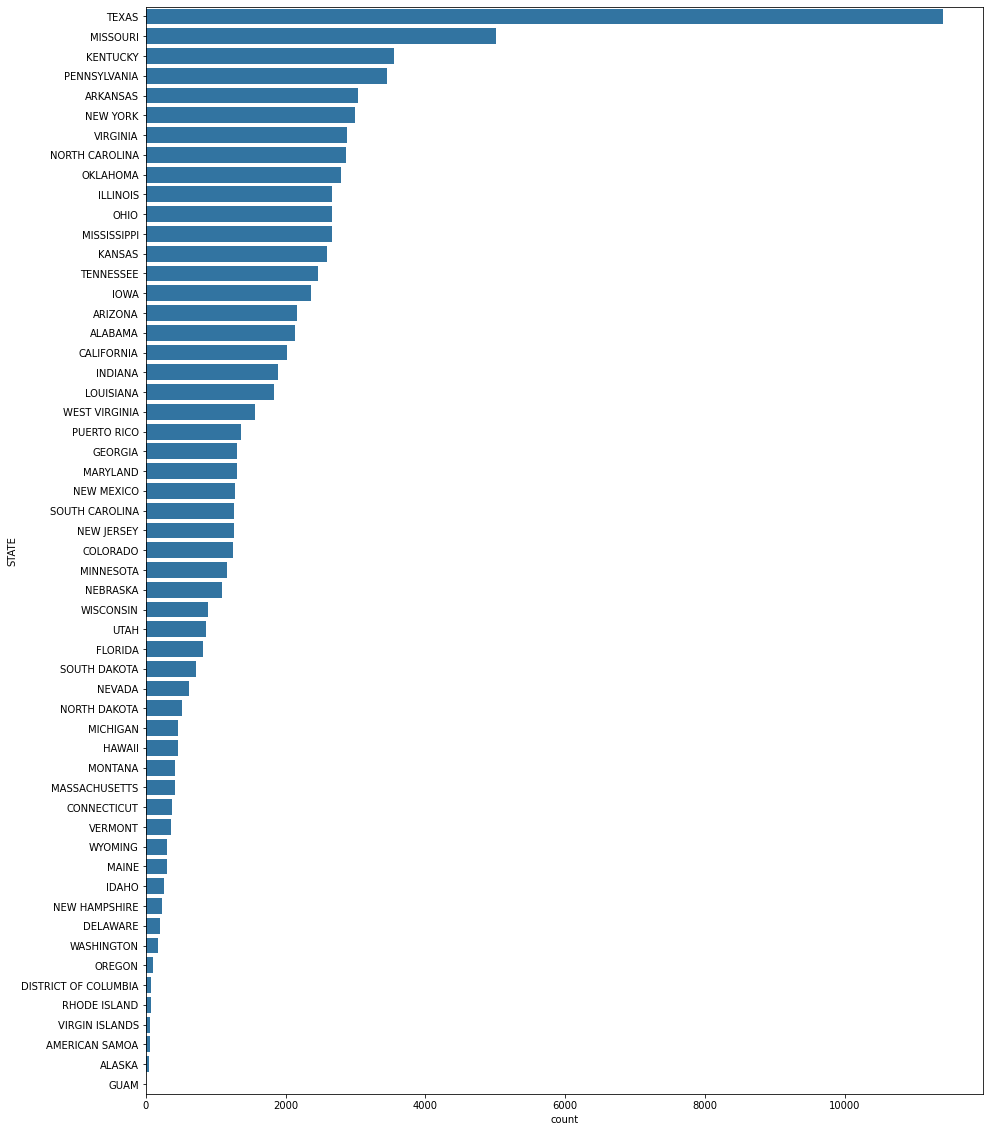

In [27]:
plt.figure(figsize = [15, 20])
sb.countplot(data = df, y = 'STATE', order=df['STATE'].value_counts().index, color = sb.color_palette()[0])
plt.show()

### Duration

In [66]:
from datetime import datetime
def time_diff(d1, d2):
    d1 = datetime.strptime(d1, "%d-%b-%y %H:%M:%S")
    d2 = datetime.strptime(d2, "%d-%b-%y %H:%M:%S")
    return (d1 - d2).total_seconds()/3600

df['DURATION'] = df.apply(lambda row: time_diff(row['END_DATE_TIME'], row['BEGIN_DATE_TIME']), axis=1) 

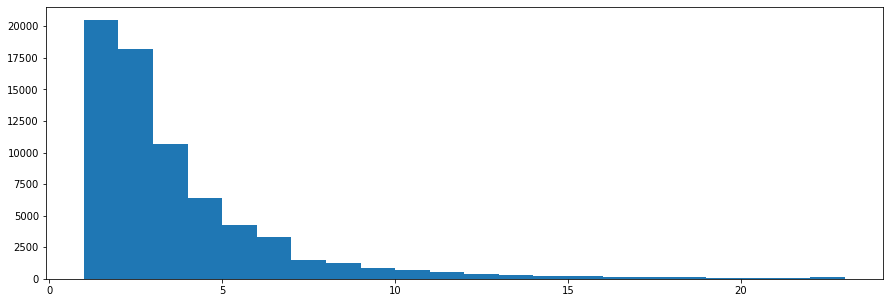

In [96]:
plt.figure(figsize = [15, 5])
dur_bins = np.arange(1, 24, 1)
plt.hist(data=df[df['DURATION']<=24], x = 'DURATION', bins=dur_bins);
plt.show()

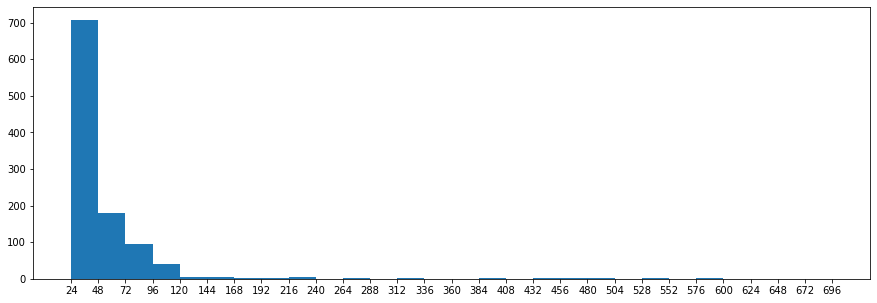

In [98]:
plt.figure(figsize = [15, 5])
dur_bins = np.arange(24, 700, 24)
plt.hist(data=df[df['DURATION']>24], x = 'DURATION', bins=dur_bins);
plt.xticks(dur_bins)
plt.show()

### Distance

In [130]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

df['DISTANCE'] =  df.apply(lambda row: haversine(
            row['BEGIN_LON'], row['BEGIN_LAT'], 
            row['END_LON'], row['END_LAT']), axis=1) 

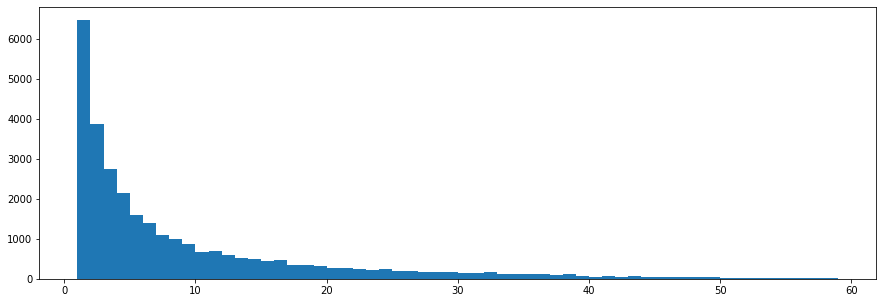

In [140]:
plt.figure(figsize = [15, 5])
dis_bins = np.arange(1, 60, 1)
plt.hist(data=df[df['DISTANCE']<=60], x = 'DISTANCE', bins = dis_bins);
plt.show()

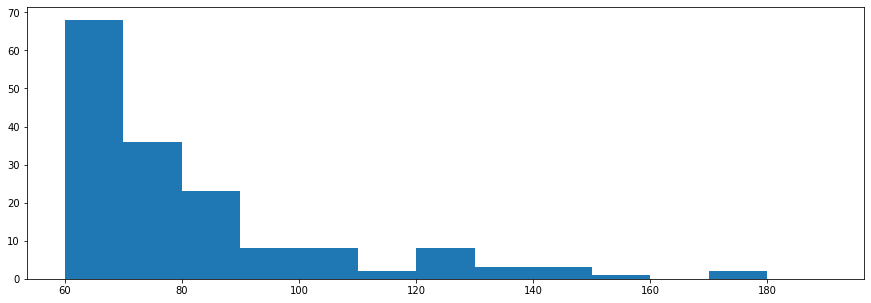

In [136]:
plt.figure(figsize = [15, 5])
dis_bins = np.arange(60, 200, 10)
plt.hist(data=df[df['DISTANCE']>60], x = 'DISTANCE', bins = dis_bins);
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

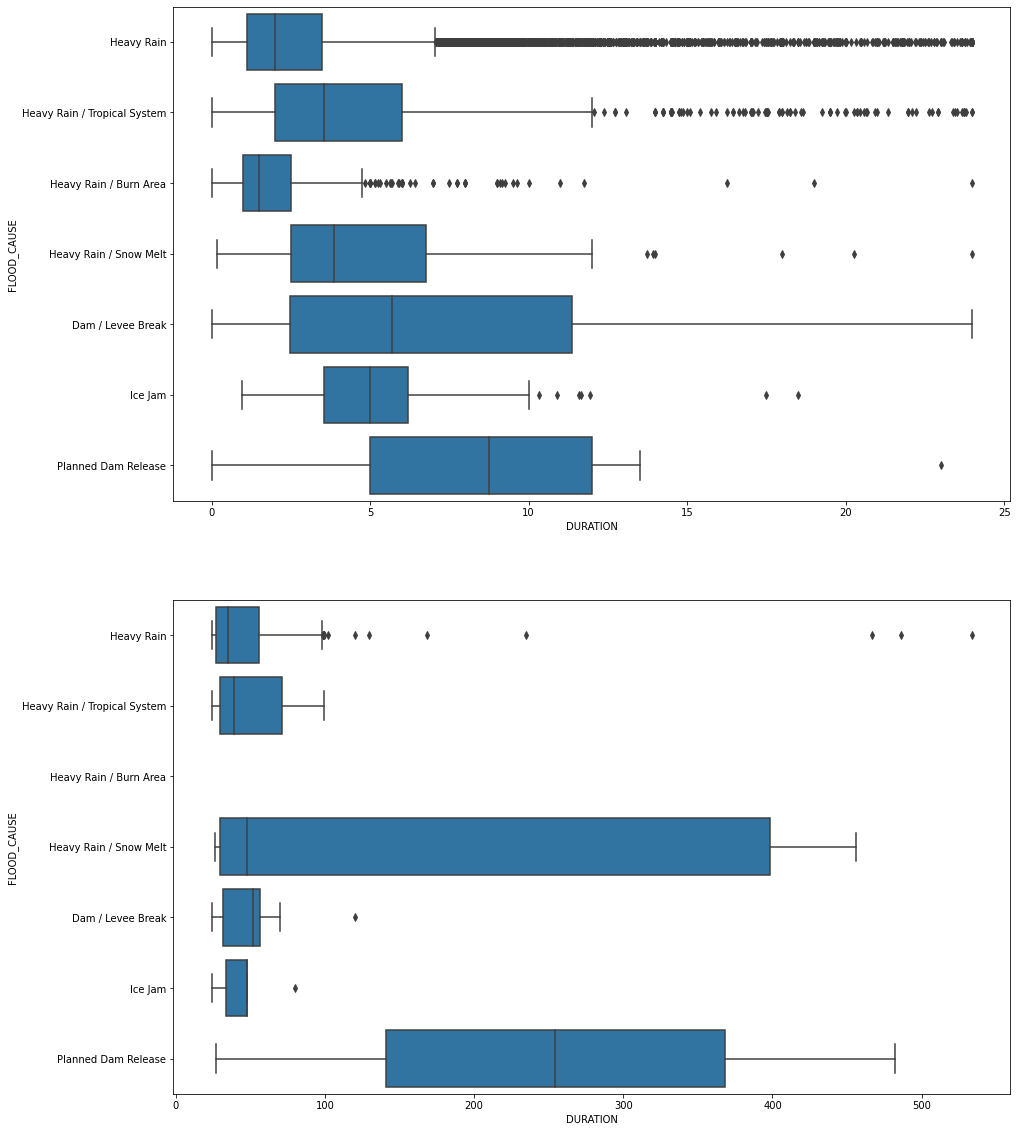

In [129]:
plt.figure(figsize = [15,20])

plt.subplot(2, 1, 1) 
sb.boxplot(data = df[df['DURATION']<=24], y = 'FLOOD_CAUSE', x = 'DURATION', color = sb.color_palette()[0], 
              order=df['FLOOD_CAUSE'].value_counts().index)

plt.subplot(2, 1, 2) 
sb.boxplot(data = df[df['DURATION']>24], y = 'FLOOD_CAUSE', x = 'DURATION', color = sb.color_palette()[0],
              order=df['FLOOD_CAUSE'].value_counts().index)

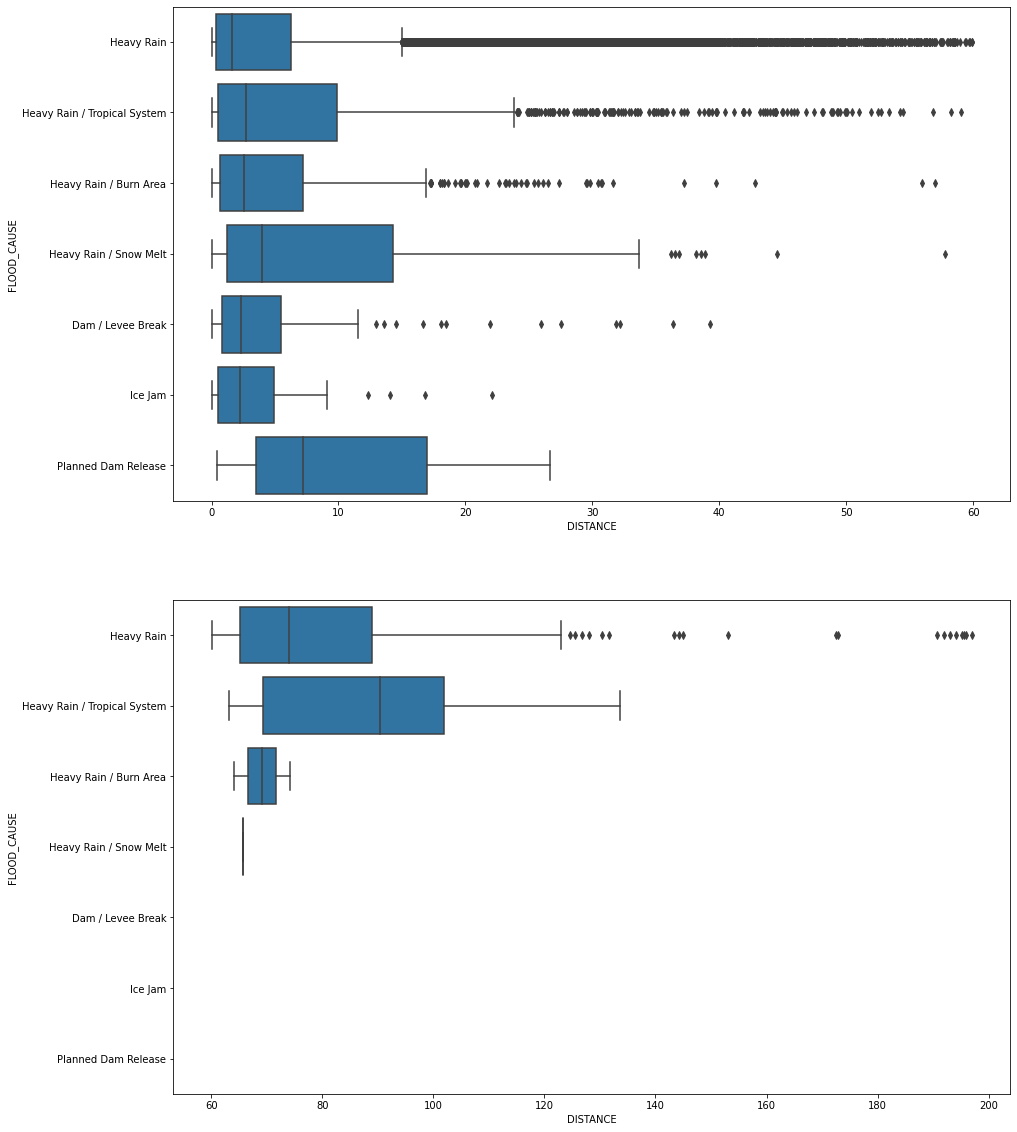

In [141]:
plt.figure(figsize = [15,20])

plt.subplot(2, 1, 1) 
sb.boxplot(data = df[df['DISTANCE']<=60], y = 'FLOOD_CAUSE', x = 'DISTANCE', color = sb.color_palette()[0], 
              order=df['FLOOD_CAUSE'].value_counts().index)

plt.subplot(2, 1, 2) 
sb.boxplot(data = df[df['DISTANCE']>60], y = 'FLOOD_CAUSE', x = 'DISTANCE', color = sb.color_palette()[0],
              order=df['FLOOD_CAUSE'].value_counts().index)

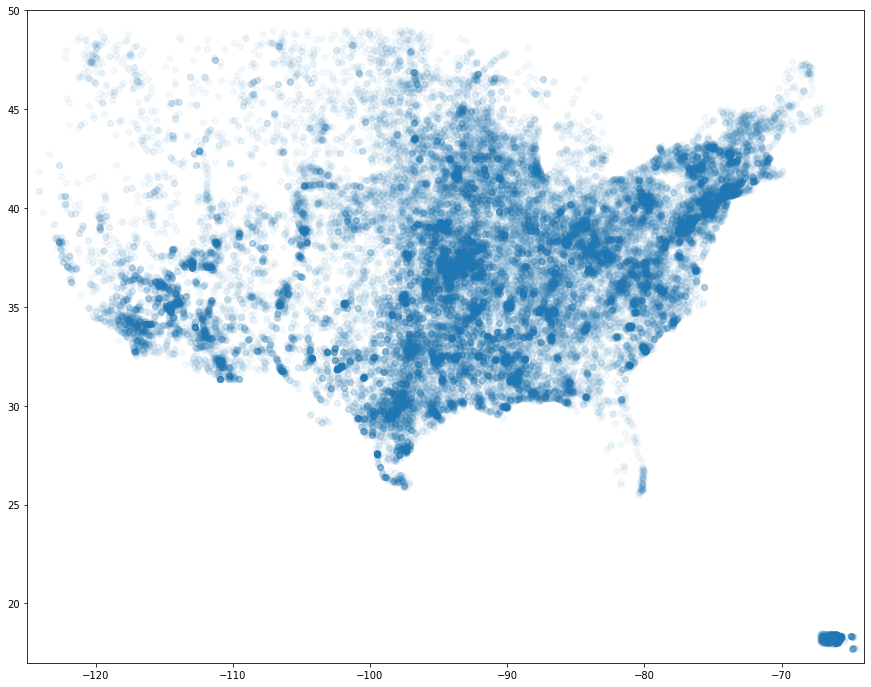

In [47]:
plt.figure(figsize= [15,12])
plt.scatter(data=df, x='BEGIN_LON', y='BEGIN_LAT', alpha=1/20)
plt.xlim(-125, -64)
plt.ylim(17, 50)
plt.show()

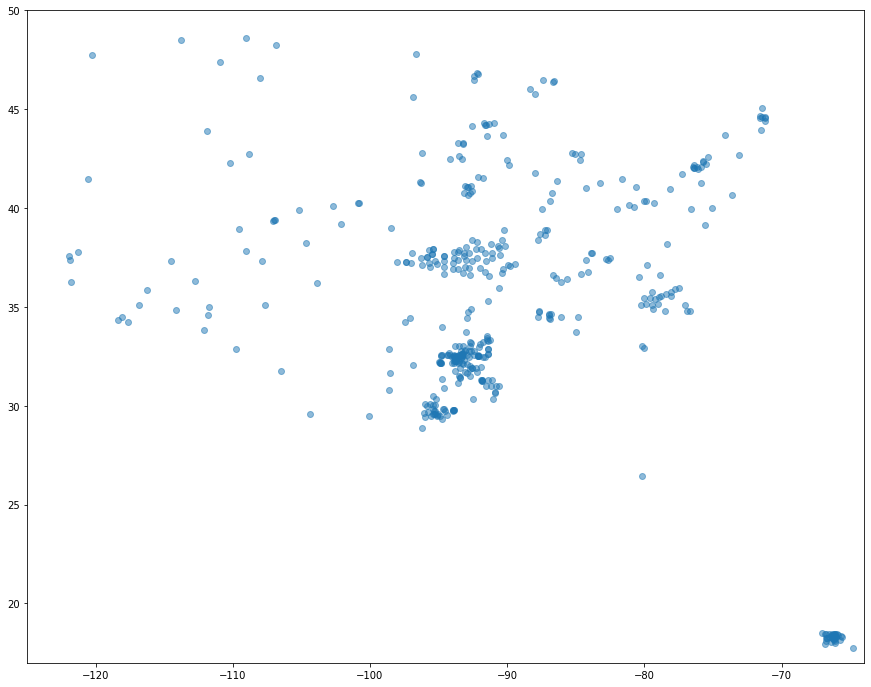

In [104]:
plt.figure(figsize= [15,12])
plt.scatter(data=df[df['DURATION']>24], x='BEGIN_LON', y='BEGIN_LAT', alpha=1/2)
plt.xlim(-125, -64)
plt.ylim(17, 50)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!